In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./listings_details.csv",low_memory=False)
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


In [3]:
df.neighbourhood.unique()

array(['Indische Buurt', 'Spaarndammer en Zeeheldenbuurt',
       'Grachtengordel', 'Westelijke Eilanden', 'Bos en Lommer',
       'Amsterdam Centrum', 'Hoofddorppleinbuurt', nan, 'Oud-Zuid',
       'Jordaan', 'Oostelijke Eilanden en Kadijken', 'De Pijp',
       'Oud-West', 'Zeeburg', 'Nieuwmarkt en Lastage', 'Museumkwartier',
       'De Wallen', 'Slotervaart', 'Nieuwendammerdijk en Buiksloterdijk',
       'Rivierenbuurt', 'Stadionbuurt', 'Weesperbuurt en Plantage',
       'Oosterparkbuurt', 'Watergraafsmeer', 'IJplein en Vogelbuurt',
       'Volewijck', 'Banne Buiksloot', 'Oost', 'Frederik Hendrikbuurt',
       'Slotermeer-Zuidwest', 'Overtoomse Veld', 'Buitenveldert-West',
       'Buikslotermeer', 'Buiksloterham', 'Oostzanerwerf',
       'Slotermeer-Noordoost', 'Nieuwendam-Noord', 'Landelijk Noord',
       'Osdorp', 'Tuindorp Oostzaan', 'Kadoelen', 'Tuindorp Nieuwendam',
       'Buitenveldert-Oost', 'Tuindorp Buiksloot', 'Nieuwendammerham'],
      dtype=object)

In [4]:
df2 = pd.read_csv("./reviews_details.csv")

In [5]:
df2.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [6]:
df_merged = pd.merge(df, df2, on='id')

In [20]:
df_merged.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month', 'listing_id', 'date', 'reviewer_id',
       'reviewer_name', 'comments'],
      dtype='object', length=101)

In [21]:
df_filter = df_merged.dropna(subset='comments')

In [22]:
group_summaries = df_filter.groupby('neighbourhood')['comments'].apply(list).reset_index()
group_summaries

,neighbourhood,comments
0,Bos en Lommer,"[Weekend break, The apartment is clean and bea..."
1,De Pijp,"[Great studio, way more spacious then a hotel ..."
2,De Wallen,"[It was a great sunny week in Amsterdam, in th..."
3,Frederik Hendrikbuurt,[Wonderful place to be in Amsterdam! Marcel is...
4,Hoofddorppleinbuurt,[Hinke was a really friendly person and we wer...
5,Indische Buurt,"[Nice, cozy and clean room. Everything was ok!..."
6,Jordaan,[Wir hatten einen wundervollen Aufenthalt in R...
7,Kadoelen,[Great room at the top of the stairs. Edwin w...
8,Nieuwmarkt en Lastage,[The appartement is very good and quiet and cl...
9,Oosterparkbuurt,[Rosie war ein super Host. Sie war sehr hilfsb...


In [23]:
# Filter the DataFrame to get the summaries for the 'Amsterdam Centrum' neighborhood
Bos_en_Lommer = df_filter[df_filter['neighbourhood'] == 'Bos en Lommer']['comments'].tolist()
        
# Print the summaries for Bos_en_Lommer
print(Bos_en_Lommer)


['Weekend break', "The apartment is clean and beautiful and a friend of the host waited for us when we arrived. It's perfect for a couple with young kids - has lots of toys and space for the kids to play, and the kids' bedroom is very convenient. We didn't use the garden too much because of the rain. \r\nThe location is very convenient - a quiet street, walking distance from the main street (Kinkerstraat) where you have supermarkets and everything else you need. The tram to the center is also a 5 minutes walking distance and it's just 5 stops to the Dam square. The are also several attractions that are a walking distance from the apartment (Jordan, the 9 street district, Vondel part and more).\r\nOverall, very recommended. \r\n ", 'The apartment was great, we had nothing wrong.\r\nBUT: The apartment is not at the point marked in the map location. It is 30 minutes walk further out of position. (Behind the Westerpark!) 45 Minten walk to downtown!\r\nWhether AirBnB or the owner has set th

In [24]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()


def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    puch_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in puch_free.split())
    return normalized

clean_summary = [clean(doc).split() for doc in Bos_en_Lommer]
clean_summary


from gensim import corpora

dictionary = corpora.Dictionary(clean_summary)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_summary]

In [25]:
doc_term_matrix

[[(0, 1), (1, 1)],
 [(2, 2),
  (3, 1),
  (4, 2),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 3),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 3),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 3),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 3),
  (52, 1)],
 [(5, 3),
  (10, 1),
  (25, 2),
  (28, 2),
  (53, 2),
  (54, 2),
  (55, 3),
  (56, 2),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 4),
  (71, 6),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 2),
  (81, 2),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),

In [26]:
from gensim.models import LdaModel

lda = LdaModel(doc_term_matrix, num_topics=5, id2word=dictionary)

print(lda.print_topics(num_topics= 5, num_words=5))

[(0, '0.027*"die" + 0.020*"der" + 0.018*"walk" + 0.015*"apartment" + 0.015*"ist"'), (1, '0.026*"die" + 0.019*"apartment" + 0.019*"der" + 0.015*"wohnung" + 0.014*"45"'), (2, '0.035*"break" + 0.035*"weekend" + 0.008*"die" + 0.007*"walk" + 0.007*"apartment"'), (3, '0.033*"great" + 0.031*"stay" + 0.018*"couple" + 0.017*"host" + 0.017*"easy"'), (4, '0.022*"apartment" + 0.022*"walking" + 0.020*"kid" + 0.020*"street" + 0.019*"die"')]


In [68]:
import pyLDAvis.gensim

# Enable notebook display
pyLDAvis.enable_notebook()

# Prepare and display the visualization
LDAvis_prepared = pyLDAvis.gensim.prepare(lda, doc_term_matrix, dictionary)
pyLDAvis.display(LDAvis_prepared)
pyLDAvis.save_html(LDAvis_prepared, 'lda_visualization.html')


NameError: name 'lda' is not defined

# 2nd type of modeling 

In [7]:
df2 = pd.read_csv("./reviews_details.csv")
df_merged = pd.merge(df, df2, on='id')
df_filter = df_merged.dropna(subset='comments')

In [8]:
group_summaries = df_filter.groupby('neighbourhood')['comments'].apply(list).reset_index()
group_summaries

,neighbourhood,comments
0,Bos en Lommer,"[Weekend break, The apartment is clean and bea..."
1,De Pijp,"[Great studio, way more spacious then a hotel ..."
2,De Wallen,"[It was a great sunny week in Amsterdam, in th..."
3,Frederik Hendrikbuurt,[Wonderful place to be in Amsterdam! Marcel is...
4,Hoofddorppleinbuurt,[Hinke was a really friendly person and we wer...
5,Indische Buurt,"[Nice, cozy and clean room. Everything was ok!..."
6,Jordaan,[Wir hatten einen wundervollen Aufenthalt in R...
7,Kadoelen,[Great room at the top of the stairs. Edwin w...
8,Nieuwmarkt en Lastage,[The appartement is very good and quiet and cl...
9,Oosterparkbuurt,[Rosie war ein super Host. Sie war sehr hilfsb...


In [9]:
import re

# Define a function to process each comment
def process_comment(comment):
    # Remove punctuation
    comment = re.sub('[,.!?]', '', comment)
    # Convert to lowercase
    comment = comment.lower()
    return comment

# Apply the function to each comment in the 'comments' column
group_summaries['comment_processed'] = group_summaries['comments'].apply(lambda x: [process_comment(comment) for comment in x])

# Print out the first rows of the processed comments
print(group_summaries['comment_processed'].head())


0    [weekend break, the apartment is clean and bea...
1    [great studio way more spacious then a hotel i...
2    [it was a great sunny week in amsterdam in thi...
3    [wonderful place to be in amsterdam marcel is ...
4    [hinke was a really friendly person and we wer...
Name: comment_processed, dtype: object


In [10]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = group_summaries.comment_processed.values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:1][0][:30])

['weekend', 'break', 'the', 'apartment', 'is', 'clean', 'and', 'beautiful', 'and', 'friend', 'of', 'the', 'host', 'waited', 'for', 'us', 'when', 'we', 'arrived', 'it', 'perfect', 'for', 'couple', 'with', 'young', 'kids', 'has', 'lots', 'of', 'toys']


In [11]:
# data_words

# Phrase Modeling: Bigram and Trigram Models

In [12]:
# building bigram and trigram model
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

trigram = gensim.models.Phrases(bigram_mod[data_words], threshold=100)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Remove Stopwords, Make Bigrams and Lemmatize

In [13]:
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def rem_stop_words(text):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in text]

# Here's a breakdown of what simple_preprocess typically does:
# Converts the text to lowercase.
# Splits the text into individual words or tokens.
# Removes punctuation marks.
# Optionally, it might perform additional tasks like stemming or lemmatization,
# depending on the specific implementation.

def make_bigram(text):
    return[bigram_mod[doc] for doc in text]

def make_trigram(text):
    return[trigram_mod[doc] for doc in text]

def lemmatation(text, allowed_postags= ['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in text:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
    




In [14]:
# import spacy

# # Load English language model
# nlp = spacy.load("en_core_web_sm")

# # Define the sentence
# sentence = "I deposited money in the bank. I will bank on you to help me."

# # Process the sentence with SpaCy
# doc = nlp(sentence)

# # Lemmatize and filter based on allowed part-of-speech tags
# lemmas = [token.lemma_ for token in doc if token.pos_ in ['NOUN', 'VERB']]

# # Print lemmas
# print(lemmas)


# lets call the function in order

In [15]:
import spacy

data_words_nonstops = rem_stop_words(data_words)

data_words_bigrams = make_bigram(data_words_nonstops)

data_words_trigrams = make_trigram(data_words_bigrams)

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# lemmetization
data_lemmatization = lemmatation(data_words_bigrams,allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatization[:1][0][:30])


['weekend', 'break', 'apartment', 'clean', 'beautiful', 'friend', 'host', 'wait', 'arrive', 'perfect', 'couple', 'young', 'kid', 'lot', 'toy', 'space', 'kid', 'play', 'kid', 'bedroom', 'convenient', 'garden', 'much', 'rain', 'location', 'convenient', 'quiet', 'street', 'walk', 'distance']


In [16]:
import gensim.corpora as corpora

# create dictonary
id2word = corpora.Dictionary(data_lemmatization)

# create corpus
texts = data_lemmatization

# term document frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 5), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 2), (15, 1), (16, 2), (17, 1), (18, 3), (19, 3), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


# building LDA model

In [17]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                      id2word=id2word,num_topics=10,
                                      random_state=100,
                                      chunksize=100,
                                      passes=10,
                                      per_word_topics=True)

# viewng LDA model`

In [18]:
from pprint import pprint

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.029*"good" + 0.024*"make" + 0.024*"place" + 0.018*"apartment" + '
  '0.018*"lot" + 0.018*"great" + 0.018*"recommend" + 0.018*"go" + '
  '0.018*"lovely" + 0.012*"stay"'),
 (1,
  '0.043*"great" + 0.023*"room" + 0.023*"location" + 0.023*"well" + '
  '0.023*"welcome" + 0.023*"top" + 0.002*"nice" + 0.002*"apartment" + '
  '0.002*"place" + 0.002*"really"'),
 (2,
  '0.048*"apartment" + 0.024*"und" + 0.013*"great" + 0.013*"die" + '
  '0.013*"recommend" + 0.013*"arrive" + 0.013*"hat" + 0.013*"sind" + '
  '0.013*"weekend" + 0.013*"much"'),
 (3,
  '0.044*"marco" + 0.022*"place" + 0.012*"stay" + 0.012*"nice" + 0.012*"time" '
  '+ 0.012*"much" + 0.012*"wonderful" + 0.012*"area" + 0.012*"clean" + '
  '0.012*"accommodate"'),
 (4,
  '0.025*"stay" + 0.025*"host" + 0.013*"great" + 0.013*"apartment" + '
  '0.013*"room" + 0.013*"nice" + 0.013*"comfortable" + 0.013*"bed" + '
  '0.013*"area" + 0.013*"airbnb"'),
 (5,
  '0.029*"location" + 0.029*"place" + 0.016*"comfortable" + 0.015*"quiet" + '
  '0

# coherence score

In [19]:
from gensim.models import CoherenceModel

# compute coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatization, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'coherence score :  {coherence_lda:.4f}')

coherence score :  0.6890


In [26]:
# from gensim.models import CoherenceModel

# # compute coherence score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatization, dictionary=id2word, coherence='u_mass')
# coherence_lda = coherence_model_lda.get_coherence()
# print(f'coherence score :  {coherence_lda:.4f}')

In [27]:
# from gensim.models import CoherenceModel

# # compute coherence score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatization, dictionary=id2word, coherence='c_uci')
# coherence_lda = coherence_model_lda.get_coherence()
# print(f'coherence score :  {coherence_lda:.4f}')

# Hyperparameter Tuning

1. Number of Topics (K)

2. Dirichlet hyperparameter alpha: Document-Topic Density

3. Dirichlet hyperparameter beta: Word-Topic Density

In [28]:
def compute_coherence_value(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                          id2word=id2word,
                                          num_topics = k,
                                          random_state=100,
                                          passes = 10,
                                          alpha = a,
                                          eta= b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatization, dictionary=id2word, coherence='c_v')
    return coherence_model_lda.get_coherence()

In [32]:
import numpy as np
import tqdm
import os 

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_value(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    os.makedirs('./results/', exist_ok=True)
    pd.DataFrame(model_results).to_csv('./results/lda_tuning_results.csv', index=False)
    pbar.close()



100%|████████████████████████████████████| 540/540 [39:40<00:00,  4.41s/it]


In [33]:
result_df = pd.read_csv("./results/lda_tuning_results.csv")
result_df.head()

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.267648
1,75% Corpus,2,0.01,0.31,0.267648
2,75% Corpus,2,0.01,0.61,0.261881
3,75% Corpus,2,0.01,0.9099999999999999,0.396882
4,75% Corpus,2,0.01,symmetric,0.272323


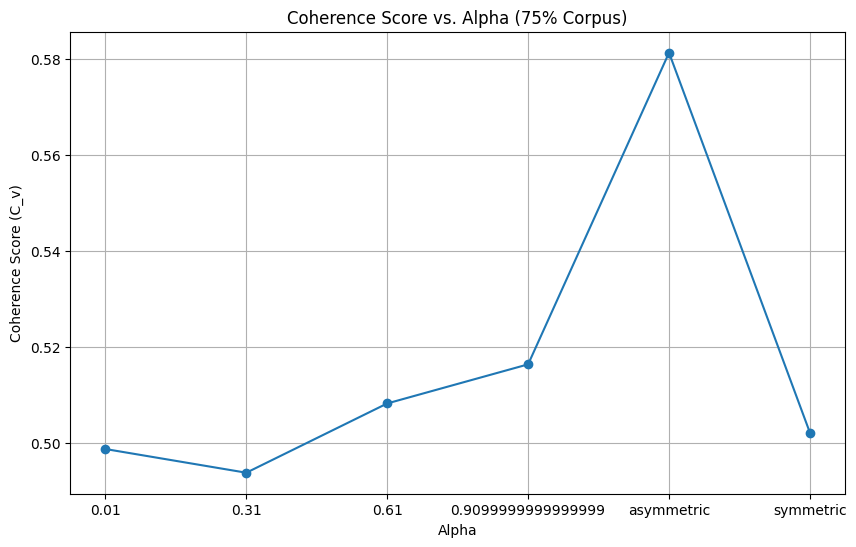

In [34]:
import matplotlib.pyplot as plt

# Filter the DataFrame for a specific validation set (e.g., '75% Corpus')
validation_set = '75% Corpus'
filtered_df = result_df[result_df['Validation_Set'] == validation_set]

# Group the filtered DataFrame by 'Alpha' and calculate the mean coherence score for each alpha value
grouped_df = filtered_df.groupby('Alpha')['Coherence'].mean().reset_index()

# Sort the DataFrame by 'Alpha' for plotting
grouped_df.sort_values(by='Alpha', inplace=True)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Alpha'], grouped_df['Coherence'], marker='o', linestyle='-')
plt.xlabel('Alpha')
plt.ylabel('Coherence Score (C_v)')
plt.title(f'Coherence Score vs. Alpha ({validation_set})')
plt.grid(True)
plt.show()


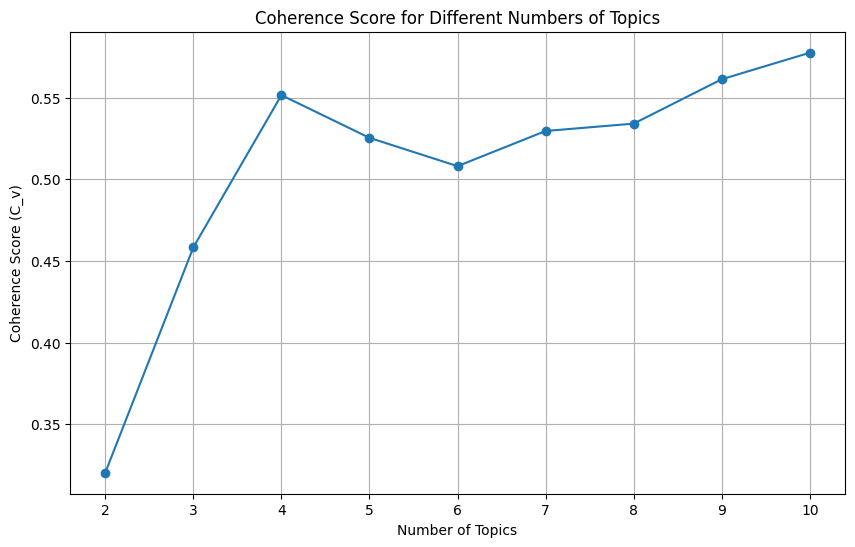

In [38]:
data = result_df[['Topics', 'Coherence']]

# Aggregate data by averaging coherence scores for each number of topics
aggregated_data = data.groupby('Topics').mean().reset_index()

# Sort data by number of topics
aggregated_data = aggregated_data.sort_values(by='Topics')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data['Topics'], aggregated_data['Coherence'], marker='o', linestyle='-')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (C_v)')
plt.title('Coherence Score for Different Numbers of Topics')
plt.grid(True)
plt.show()

In [44]:
# Filter data for K=8
data_k8 = result_df[result_df['Topics'] == 10]

# Find row with maximum coherence score for K=8
max_row_k8 = data_k8.loc[data_k8['Coherence'].idxmax()]

# Extract optimal alpha and beta parameters
optimal_alpha = max_row_k8['Alpha']
optimal_beta = max_row_k8['Beta']

print("Optimal Alpha:", optimal_alpha)
print("Optimal Beta:", optimal_beta)


Optimal Alpha: symmetric
Optimal Beta: symmetric


In [43]:
# Filter data for K=8
data_k8 = result_df[result_df['Topics'] == 10]

# Find row with maximum coherence score for K=8
max_row_k10 = data_k10.loc[data_k10['Coherence'].idxmax()]

# Sort filtered DataFrame by coherence score in descending order
sorted_data_k8 = data_k8.sort_values(by='Coherence', ascending=False)

# Select columns Beta, Alpha, Coherence, and Topics
selected_columns = sorted_data_k10[['Beta', 'Alpha', 'Coherence', 'Topics']]

# Optionally reset the index
selected_columns = selected_columns.reset_index(drop=True)

print(selected_columns.head())


        Beta               Alpha  Coherence  Topics
0  symmetric           symmetric   0.687779      10
1       0.31  0.9099999999999999   0.666514      10
2  symmetric  0.9099999999999999   0.664836      10
3       0.01  0.9099999999999999   0.652979      10
4       0.61  0.9099999999999999   0.651673      10


In [45]:
num_topics = 10

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           eta='symmetric')

In [22]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os
num_topics = 10

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_tuned_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_tuned_'+ str(num_topics) +'.html')

LDAvis_prepared

C:\Users\amalv\anaconda3\jupyter\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.080055 -0.068838       1        1  36.102896
9     -0.150192  0.076953       2        1  23.198553
0      0.137325  0.123565       3        1  16.929213
3     -0.036862 -0.005991       4        1   6.876915
2      0.002975 -0.112641       5        1   5.834322
4      0.009304  0.013017       6        1   5.573704
5     -0.039672 -0.001397       7        1   4.010341
1      0.000957 -0.003522       8        1   1.023727
6     -0.002122 -0.010721       9        1   0.225164
7     -0.001769 -0.010426      10        1   0.225164, topic_info=            Term       Freq      Total Category  logprob  loglift
31         great  18.000000  18.000000  Default  30.0000  30.0000
39      location  11.000000  11.000000  Default  29.0000  29.0000
3      apartment  16.000000  16.000000  Default  28.0000  28.0000
131      welcome   4.000000   4.000000  Default  27.0000  27.0000
167        place   7.000000   7.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
52          nice   0.004229   9.079360  Topic10  -6.0122  -1.5757
1           also   0.004226   5.529325  Topic10  -6.0128  -1.0804
75   supermarket   0.004226   3.745947  Topic10  -6.0128  -0.6910
31         great   0.004221  18.394016  Topic10  -6.0142  -2.2837
60         quiet   0.004219   7.505796  Topic10  -6.0145  -1.3877

[532 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
218       5  1.009451      absolut
91        1  0.527634  accommodate
91        4  0.527634  accommodate
185       4  0.968517   additional
298       2  0.962315      address
...     ...       ...          ...
175       1  0.289939    wonderful
175       2  0.289939    wonderful
175       3  0.289939    wonderful
175       4  0.289939    wonderful
89        1  0.911428        wrong

[382 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 10, 1, 4, 3, 5, 6, 2, 7, 8])